# Практика

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [224]:
from scipy.stats import dweibull
a = 3
dweibull_d = dweibull(a) #распределение Вейбулла (двойное)
sample = dweibull_d.rvs(100) #генерация выборки
sample

array([-2.01943954,  1.01751132, -1.94085664, -1.05890106,  0.99612789,
       -0.79810378, -1.11446698, -0.98510595, -0.88733283, -0.81903824,
        0.64953959,  1.22216382, -1.32649163, -0.50589261,  0.75440759,
       -0.46470777, -1.00802988,  0.51822913,  1.35118307,  1.3784575 ,
        1.14068351, -1.24790425, -0.5326019 ,  0.81741029, -1.40973377,
       -0.40563901,  1.25186745,  1.27933383, -0.98767719,  1.18049814,
       -0.31447707,  1.16184784,  1.44489889, -0.64976418,  0.36119267,
       -0.6211226 ,  0.6269729 ,  0.90956236, -1.59615197, -1.24026122,
       -0.9828693 , -0.71146986, -1.05867613, -1.25260045,  1.1865496 ,
        0.9063032 ,  1.35495344, -0.7702649 ,  1.27891629, -0.79412255,
        1.50989916, -1.1897039 , -0.359183  ,  0.94526712,  1.05734079,
       -0.48456368,  0.690734  , -0.61621509, -0.94352139, -0.65925876,
        0.96119882,  0.87663806,  0.74517467,  1.44886015,  0.89911539,
        1.56256888, -0.98163324, -0.60217505,  0.99016376,  0.94

In [225]:
sample.dtype

dtype('float64')

In [233]:
real_mean = dweibull_d.mean() #настоящее среднее случайной величины
print(real_mean)

0.0


In [227]:
real_var = dweibull_d.var() #настоящая дисперсия случайной величины
print(real_var)

0.9027452929509335


### Постройте гистограмму выборки и теоретическую плотность распределения

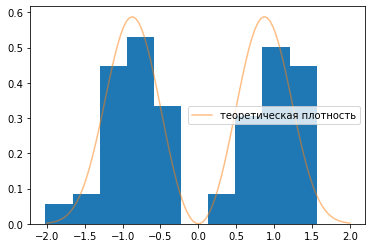

In [228]:
plt.hist(sample, density=True)
x = np.linspace(-2, 2, 100)
pdf = dweibull_d.pdf(x) #значение плотности в точке
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

In [229]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

0.02220828724249821
1.0218161252205697


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

Оригинальное распределение: матожидание: 0.0, дисперсия: 0.9027, ср.кв. отклонение: 0.9501
Выборка: матожидание: 0.0222, дисперсия: 1.0218, ср.кв. отклонение: 1.0108
Количество выборочных средних: 10, матожидание: 0.0128, дисперсия: 0.0914, ср.кв. отклонение: 0.3024
Количество выборочных средних: 100, матожидание: 0.0002, дисперсия: 0.0083, ср.кв. отклонение: 0.0911
Количество выборочных средних: 1000, матожидание: -0.0029, дисперсия: 0.0009, ср.кв. отклонение: 0.0301
Количество выборочных средних: 10000, матожидание: -0.0002, дисперсия: 0.0001, ср.кв. отклонение: 0.0097


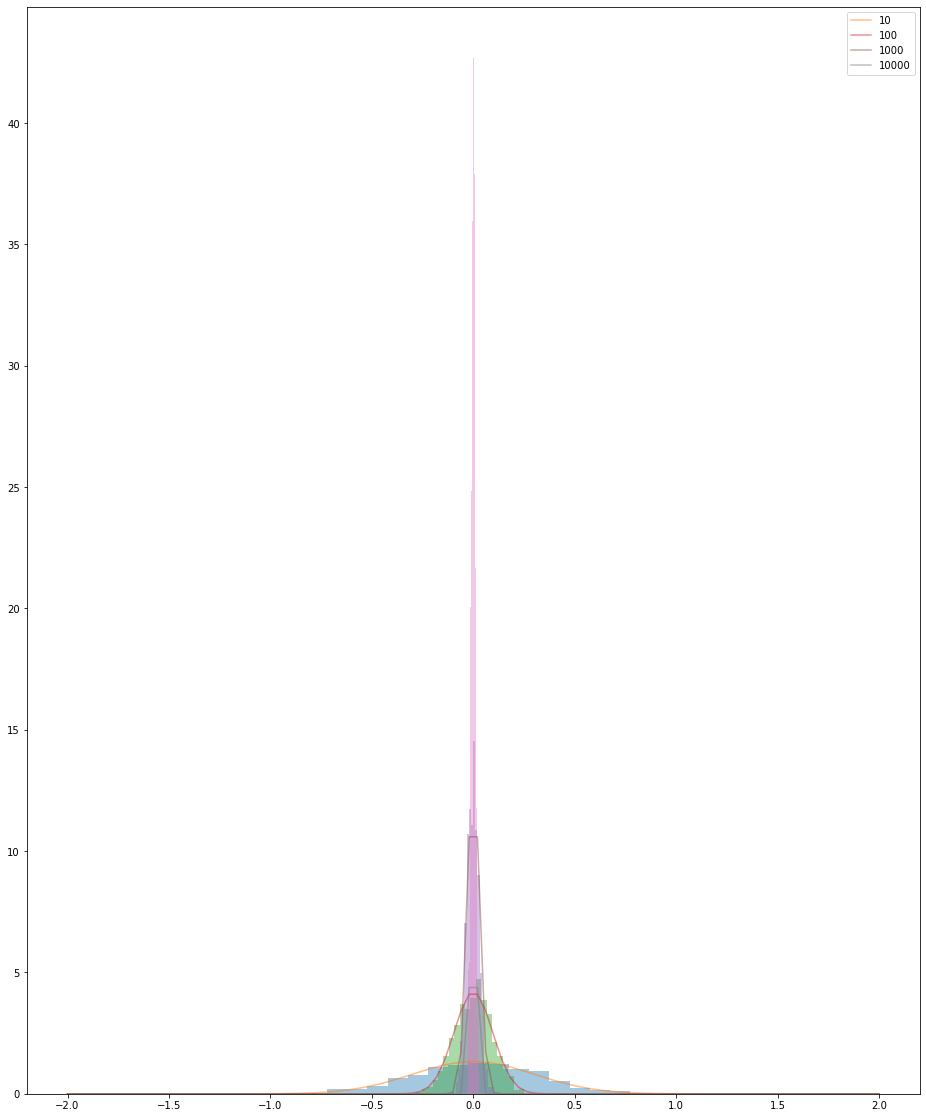

In [235]:
plt.figure(figsize=(16,20))
print(f'Оригинальное распределение: матожидание: {np.round(real_mean, decimals=4)}, дисперсия: {np.round(real_var, decimals=4)}, ср.кв. отклонение: {np.round(dweibull_d.std(), decimals=4)}')
print(f'Выборка: матожидание: {np.round(sample_mean, decimals=4)}, дисперсия: {np.round(sample_var, decimals=4)}, ср.кв. отклонение: {np.round(sample.std(), decimals=4)}')
# сгенерируем некоторое количество выборочных средних
for i in [10, 100, 1000, 10000]:
    means = []
    for j in range(1000):
         means.append(np.mean(dweibull_d.rvs(i))) #генерация выборки
    plt.hist(means, alpha=0.4, density = True, bins=20) #гистограмма выборочных средних
    norm_rv = sts.norm(loc=dweibull_d.mean(), scale=dweibull_d.std() / np.sqrt(i))
    x = np.linspace(-2, 2, 100)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, alpha=0.5)
    print(f'Количество выборочных средних: {i}, матожидание: {np.round(np.mean(means), decimals=4)}, дисперсия: {np.round(np.var(means), decimals=4)}, ср.кв. отклонение: {np.round(np.std(means), decimals=4)}')
plt.legend(['10', '100', '1000', '10000'])
plt.show()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

In [ ]:
#апроксимация распределения выборочного среднего для двойного распределение Вейбулла работает хорошо
#при этом мы можем заметить, что с ростом объема выборки значения дисперсий и стандартных отклонений заметно снижаются

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [2]:
# либо загружаем из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DA/Lesson_12/telecom_churn.csv"
df=pd.read_csv(url)
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [82]:
# ваш код тут
from statsmodels.stats.weightstats import _zconfint_generic
churn0 = df[df['churn']==False]['total day calls'].tolist() #значения "total day calls" для "не ушел"
churn1 = df[df['churn']==True]['total day calls'].tolist() #значения "total day calls" для "ушел"

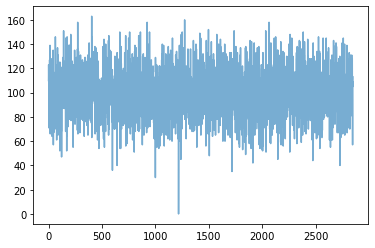

In [21]:
plt.plot(churn0, alpha = .6) #распределение значений до применения ЦПТ
plt.show()

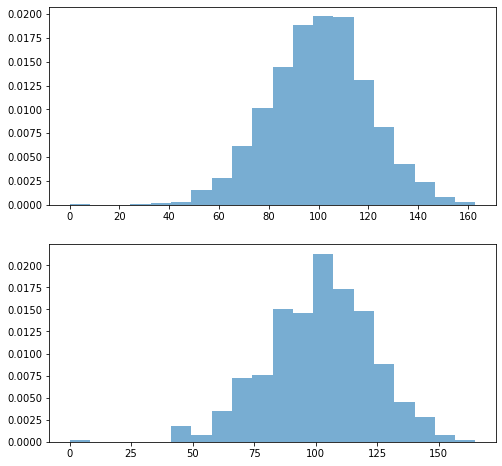

In [74]:
churn0_means = []
churn1_means = []
for i in range(len(churn0)):
         churn0_means.append(np.mean(churn0[i]))
for i in range(len(churn1)):
         churn1_means.append(np.mean(churn1[i]))
fig, axis = plt.subplots(2, 1, figsize =(8, 8))
axis
axis[0].hist(churn0_means, alpha = .6, density = True, bins=20)
axis[1].hist(churn1_means, alpha = .6, density = True, bins=20)
plt.show()

In [86]:
print("Для случая 'не ушел':")
print(f'Доверительный интервал для среднего по цпт интервальная оценка: {sts.norm.interval(0.95, loc=np.mean(churn0_means), scale=np.std(churn0_means, ddof=1)/np.sqrt(len(churn0_means)-1))}')
print(f'Доверительный интервал для среднего по цпт методом _zconfint_generic: {_zconfint_generic(np.mean(churn0_means),  np.std(churn0_means, ddof=1), alpha=0.95, alternative="two-sided")}')
print("\n\nДля случая 'ушел':")
print(f'Доверительный интервал для среднего по цпт интервальная оценка: {sts.norm.interval(0.95, loc=np.mean(churn1_means), scale=np.std(churn1_means, ddof=1)/np.sqrt(len(churn1_means)-1))}')
print(f'Доверительный интервал для среднего по цпт методом _zconfint_generic: {_zconfint_generic(np.mean(churn1_means),  np.std(churn1_means, ddof=1), alpha=0.95, alternative="two-sided")}')

Для случая 'не ушел':
Доверительный интервал для среднего по цпт интервальная оценка: (99.55606076109109, 101.0102550283826)
Доверительный интервал для среднего по цпт методом _zconfint_generic: (99.04149114274126, 101.52482464673243)


Для случая 'ушел':
Доверительный интервал для среднего по цпт интервальная оценка: (99.40866670589261, 103.26214074752355)
Доверительный интервал для среднего по цпт методом _zconfint_generic: (99.98204678079553, 102.68876067262063)
